<a href="https://colab.research.google.com/github/subhankar-nitt/Fraud-detection-demo/blob/subhankar/credit_card_fraud_detection_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic - Fraud Detection Data PreProcessing and Supervised learning
# Author-Subhankar Biswas
# Data- 23/06/2021
# Description - In this notebook we will extract the features for giving the optimal result and then apply supervised learning to build our model

# Mounting gdrive here

In [1]:
from google.colab import drive
drive.mount('/content/grdive')

Mounted at /content/grdive


# Loading the python libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline

# Loading the dataSet and Analyzing it

In [12]:
df = pd.read_csv("/content/grdive/MyDrive/Transaction data/fraudTrain.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Data Inspections

In [13]:
df.shape #total 13l rows and 23 cols

(1296675, 23)

In [14]:
df.columns #the cols present in that dataset

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [15]:
df.info() #so no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

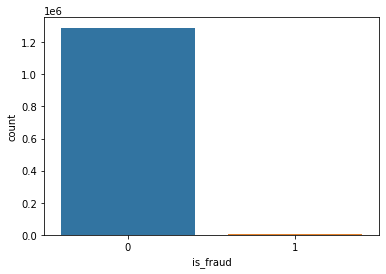

In [16]:
sns.countplot(x="is_fraud",data=df) #we can see that the no of fraud vs not fraud is highly imbalanced

# Data PreProcessing

In [17]:
df = df.drop("Unnamed: 0",axis=1) #Dropping the col Unnamed:0

In [18]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time']) #converting String to DateTime

In [19]:
df['week_day']=df['trans_date_trans_time'].dt.day_name() #Extracting the day name from the transaction date time

In [20]:
df['year_month']=df['trans_date_trans_time'].dt.to_period('M') #Extracting the month and the year from the trans date time

In [21]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_day,year_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Tuesday,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Tuesday,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Tuesday,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Tuesday,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Tuesday,2019-01


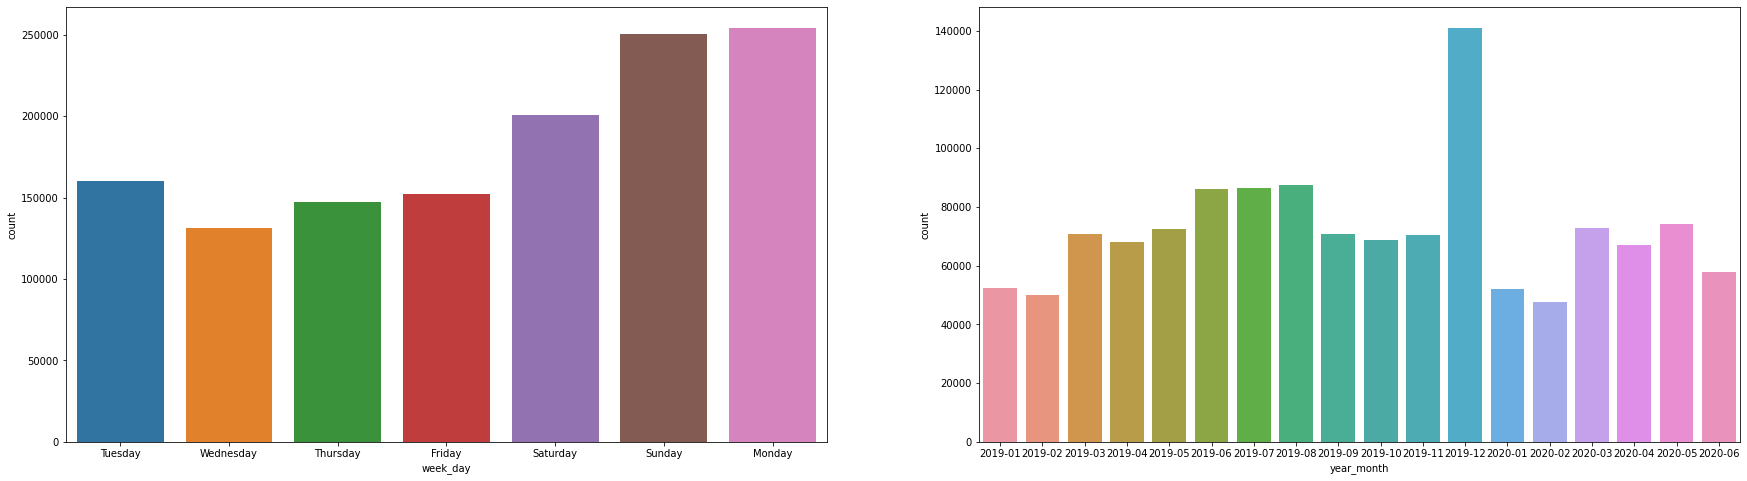

In [22]:
plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
sns.countplot(x="week_day",data=df) 
plt.subplot(1,2,2)
sns.countplot(x="year_month",data=df)

highest Transactions on Moday and Sunday

Highest no of transactions in dec,2019 and lowest on feb,2020                                

In [23]:
df['dob']=pd.to_datetime(df['dob']) #converting string to the datetime

Age = Last transaction year - Date of Birth

In [24]:
#Age of the customer is derived
df['age']=np.round((df['trans_date_trans_time']-df['dob'])/np.timedelta64(1,'Y'))

In [25]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_day,year_month,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Tuesday,2019-01,31.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Tuesday,2019-01,41.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Tuesday,2019-01,57.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Tuesday,2019-01,52.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Tuesday,2019-01,33.0


In [26]:
print("max age -> {}, min age -> {}, mean age -> {} ".format(df['age'].max(),df['age'].min(),df['age'].mean()))

max age -> 96.0, min age -> 14.0, mean age -> 45.99986041220815 


In [27]:
print("mean age for the non fraud customer {}, mean age for the fradulant customer {} \nso the mean age of two type of customers are quite same".format(df[df.is_fraud==0].age.mean(),df[df.is_fraud==1].age.mean()))

mean age for the non fraud customer 45.98357003620161, mean age for the fradulant customer 48.79776179056755 
so the mean age of two type of customers are quite same


# Checking the Distribution of amounts

In [28]:
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999]).reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1)

,Row Type,Overall Amt Distribution,Non Fraud Amt Distribution,Fraud Amt Distribution
0,count,1.296675e+06,1.289169e+06,7506.000000
1,mean,7.035104e+01,6.766711e+01,531.320092
2,std,1.603160e+02,1.540080e+02,390.560070
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.752000e+01,4.728000e+01,396.505000
5,95%,1.963100e+02,1.899000e+02,1083.985000
6,99.9%,1.499254e+03,1.503696e+03,1291.038400
7,max,2.894890e+04,2.894890e+04,1376.040000


Mean amount spent in Fraud Transaction is More than the mean amount spent in the non Fraud Transactions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

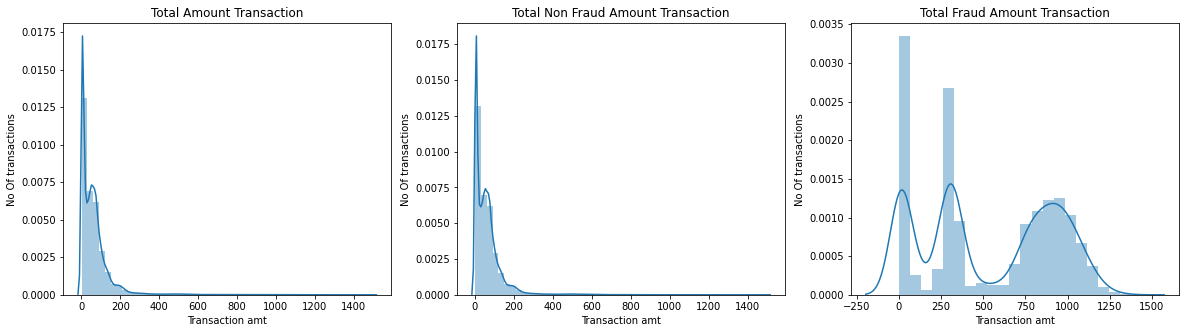

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
fig1=sns.distplot(df[df.amt <=1500].amt)
fig1.set(xlabel='Transaction amt', ylabel='No Of transactions',title='Total Amount Transaction')
plt.subplot(1,3,2)
fig2=sns.distplot(df[(df.is_fraud ==0) & (df.amt <=1500)].amt)
fig2.set(xlabel='Transaction amt', ylabel='No Of transactions',title='Total Non Fraud Amount Transaction')
plt.subplot(1,3,3)
fig3=sns.distplot(df[(df.is_fraud==1) & (df.amt <=1500) ].amt)
fig3.set(xlabel='Transaction amt', ylabel='No Of transactions',title='Total Fraud Amount Transaction')            
plt.show()


From the graph its clear that the fraud transactions are tends to have more amounts

# Months vs Fraud Transactions

In [30]:
df_fraud_transactions = df[df['is_fraud']==1]

df_timeline = df_fraud_transactions.groupby(df_fraud_transactions['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline

,year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


In [31]:
#mean of no fraud transactions by every month
df_timeline['num_of_fraud_transactions'].mean()

417.0

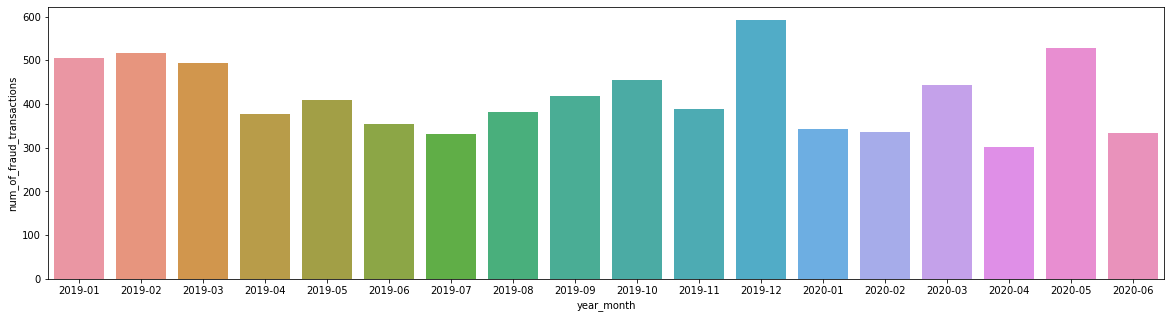

In [32]:
figure = plt.figure(figsize=(20,5))
sns.barplot(x="year_month",y="num_of_fraud_transactions",data=df_timeline)

December month on 2019 has highest no of Fraudulant Transactions

# Analysing Data Transaction Catagory wise

In [33]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percentage'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percentage'], ascending=False)

,Category,category_count,percentage
2,gas_transport,131659,10.153585
4,grocery_pos,123638,9.535003
6,home,123115,9.494669
12,shopping_pos,116672,8.997783
7,kids_pets,113035,8.717296
11,shopping_net,97543,7.522548
0,entertainment,94014,7.250390
1,food_dining,91461,7.053502
10,personal_care,90758,6.999287
5,health_fitness,85879,6.623017


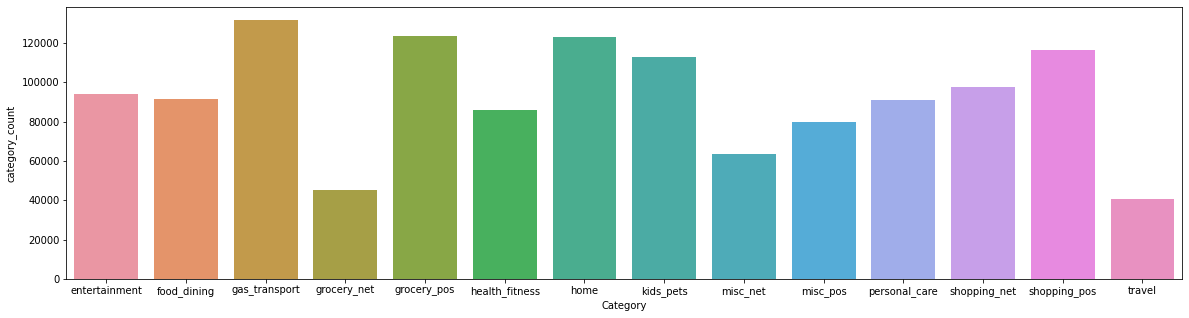

In [34]:
figure = plt.figure(figsize=(20,5))
sns.barplot(x="Category",y="category_count",data=df_category)

clearly showing that the most of the transactions has been done in the gas_transport catagory

**Fraud transaction , category wise**

In [35]:
df_fraud = df[df.is_fraud ==1]
df_category_fraud = df_fraud[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_category_fraud.columns = ['Category','is_fraud','category_count']
df_category_fraud['fraud_percentage'] = (df_category_fraud['category_count']/df_category['category_count'].sum())*100

df_category_fraud.sort_values(by = ['fraud_percentage'], ascending=False)


,Category,is_fraud,category_count,fraud_percentage
4,grocery_pos,1,1743,0.134421
11,shopping_net,1,1713,0.132107
8,misc_net,1,915,0.070565
12,shopping_pos,1,843,0.065012
2,gas_transport,1,618,0.047660
9,misc_pos,1,250,0.019280
7,kids_pets,1,239,0.018432
0,entertainment,1,233,0.017969
10,personal_care,1,220,0.016966
6,home,1,198,0.015270


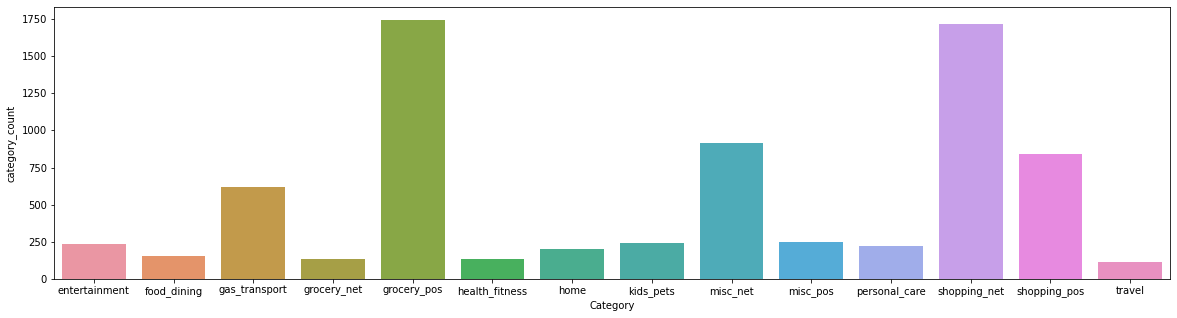

In [36]:
figure = plt.figure(figsize=(20,5))
sns.barplot(x="Category",y="category_count",data=df_category_fraud)

clear that highest no of frauds happended in the grocery_pos and shopping_net category

# Analysis on Merchant

In [38]:
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['merchant','merchant_count']

df_merchant['percentage'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percentage'], ascending=False)

,merchant,merchant_count,percentage
316,fraud_Kilback LLC,4403,0.339561
105,fraud_Cormier LLC,3649,0.281412
571,fraud_Schumm PLC,3634,0.280255
349,fraud_Kuhn LLC,3510,0.270692
70,fraud_Boyer PLC,3493,0.269381
...,...,...,...
633,fraud_Treutel-King,775,0.059768
143,"fraud_Douglas, DuBuque and McKenzie",775,0.059768
423,"fraud_Medhurst, Labadie and Gottlieb",759,0.058534
505,fraud_Reichert-Weissnat,753,0.058072


Highest no of transactions has been done by fraud_Kilback LLC merchant

**Analysis on the fraud data and getting the fraud merchants**

In [39]:
df_merchant_fraud = df_fraud[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant_fraud.columns = ['merchant','merchant_count']

df_merchant_fraud['percentage'] = (df_merchant_fraud['merchant_count']/df_merchant_fraud['merchant_count'].sum())*100

df_merchant_fraud.sort_values(by = ['percentage'], ascending=False)

,merchant,merchant_count,percentage
486,fraud_Rau and Sons,49,0.652811
334,fraud_Kozey-Boehm,48,0.639488
105,fraud_Cormier LLC,48,0.639488
146,fraud_Doyle Ltd,47,0.626166
632,fraud_Vandervort-Funk,47,0.626166
...,...,...,...
135,fraud_Dicki Ltd,1,0.013323
353,fraud_Kuphal-Toy,1,0.013323
129,fraud_Deckow-Dare,1,0.013323
120,fraud_Dach-Borer,1,0.013323


fraud_Rau and Sons	, fraud_Kozey-Boehm	, fraud_Cormier LLC	 having high no of fraud transactions



# One Hot Encoding the catagory fields

In [44]:
#hot encoding the catagory,gender and week_day cols

category_onehot = pd.get_dummies(df.category,prefix='category',drop_first=True)
gender_onehot = pd.get_dummies(df.gender,prefix='gender',drop_first=True)
week_onehot = pd.get_dummies(df.week_day,prefix='week_day',drop_first=True)

In [47]:
df_encoded = pd.concat([df,category_onehot,gender_onehot,week_onehot],axis=1)   #combining the encoded fields

In [49]:
df_encoded.head() #describing the encoded dataset

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_day,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Tuesday,2019-01,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Tuesday,2019-01,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Tuesday,2019-01,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Tuesday,2019-01,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Tuesday,2019-01,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [50]:
df_encoded.columns #cols after encoding 

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'week_day', 'year_month', 'age',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'week_day_Monday', 'week_day_Saturday', 'week_day_Sunday',
       'week_day_Thursday', 'week_day_Tuesday', 'week_day_Wednesday'],
      dtype='object')

In [53]:
df_encoded.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
week_day                           object
year_month                      pe

# Calculating the distance between the user and the merchant

In [55]:
#function to calculate the distance between two location based on theri latitude and longitude
def getDistance(lat1,lat2,lon1,lon2):
  rad = 6371 #radious of the earth is 6371

  #converting to radians for different 
  lat1=np.radians(lat1)  
  lat2=np.radians(lat2)
  lon1=np.radians(lon1)
  lon2=np.radians(lon2)

  #difference between two places latitude and longitude
  dlat = lat2-lat1
  dlon = lon2-lon1

  #formula to claculate the distance between two place
  a = np.sin(dlat/2)**2+np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2

  c = np.sqrt(a)
  #distance / time = speed , returning the speed for the   
  return c*rad

creating a new col containing the distance between the merchant and the user

In [58]:
df_encoded['dist']=getDistance(df_encoded['lat'],df_encoded['long'],df_encoded['merch_lat'],df_encoded['merch_long'])

In [59]:
df_encoded.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_day,year_month,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_day_Monday,week_day_Saturday,week_day_Sunday,week_day_Thursday,week_day_Tuesday,week_day_Wednesday,dist
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Tuesday,2019-01,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5769.599637
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Tuesday,2019-01,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5254.925202
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Tuesday,2019-01,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,5265.935520
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Tuesday,2019-01,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,5377.625588
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Tuesday,2019-01,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,5833.347119


In [60]:
df_encoded['dist'].describe()

count    1.296675e+06
mean     5.644584e+03
std      3.234227e+02
min      2.420561e+03
25%      5.516237e+03
50%      5.729283e+03
75%      5.870925e+03
max      6.007332e+03
Name: dist, dtype: float64